# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import mode
from numpy.random import randint
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Color used
color = "#4084DD"
hue_dict = {
    0: "#7A9E7E",
    1: "#BA3B54"
}

## Functions

In [4]:
# Functions
def set_style(ax, left=True, bottom=False, axis_grid="y"):
    sns.despine(ax=ax, left=left, bottom=bottom)
    ax.grid(axis=axis_grid, linewidth=0.2, color="black")

def kde(data, column, ax, color=None, meanline_color=None, hue=None, hue_colors=None, title=None):
    sns.kdeplot(data=data, x=column, ax=ax,
        fill=True, linewidth=2, color=color, hue=hue, palette=hue_colors)
    if not hue:
        ax.axvline(np.mean(data[column]), linestyle='--', color=meanline_color, linewidth=2)
    else:
        for i, value in enumerate(data[hue].unique()):
            ax.axvline(np.mean(data[data[hue] == value][column]), linestyle='--', linewidth=2, label=value, color=hue_colors[value])
    ax.set_ylabel("")
    set_style(ax)

def count_values(data, col, ax, color=None):
    data = data[col].value_counts()
    data.index = data.index.map(str)
    ax.bar(x=data.index, height=data.values, 
        linewidth=2, edgecolor='black', color=color, alpha=1)
    labels = [f"{value} | {round(value / sum(data.values) * 100, 1)}%" for value in data.values]
    for container in ax.containers:
        ax.bar_label(container, labels=labels, padding=3, fontsize=15)
    ax.tick_params(axis='y', 
        left=False,  
        right=False, 
        labelleft=False
        )
    ax.set_title(f"Value counts of \"{col}\" column", fontsize="xx-large")
    set_style(ax)

# **Dataset**
source: https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [5]:
# Import dataset from google drive
!gdown --id 1juOifs7RHB-_g2S0eqn7Czc091Bg8gft

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1juOifs7RHB-_g2S0eqn7Czc091Bg8gft
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 23.2MB/s]


In [6]:
# Make function to read the csv file using pandas library
def data_csv(data) :
  csv = pd.read_csv(data)
  return csv

In [7]:
# Show the data frame
df = data_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


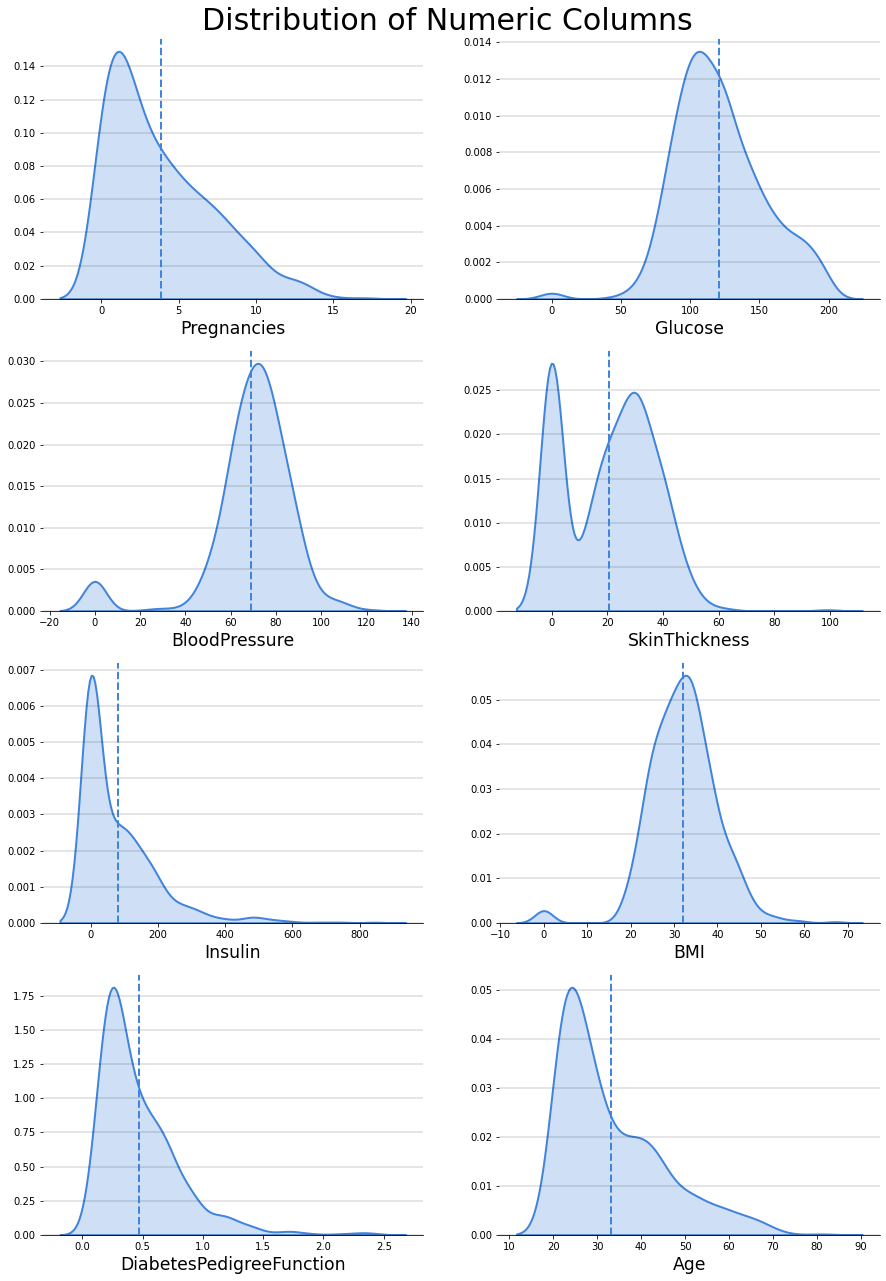

In [8]:
# Show the distribution of numeric columns 
fig, axs = plt.subplots(4, 2, figsize=(15, 22))
for i, col in enumerate(df.columns.drop("Outcome")):
    ax = axs[i // 2][i % 2]
    kde(df, col, ax, color=color, meanline_color=color)
    ax.set_xlabel(col, fontsize="xx-large")

fig.suptitle("Distribution of Numeric Columns", fontsize=30, y=0.90)
plt.show()

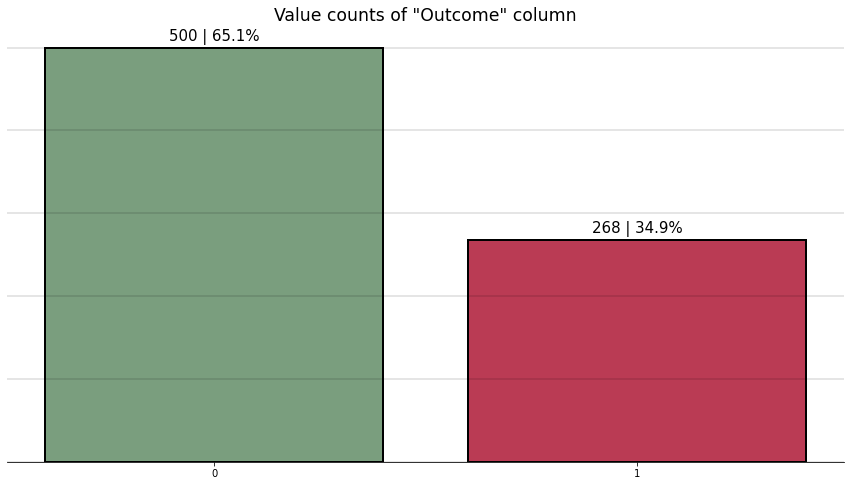

In [9]:
# Value counts of Outcomn column
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
count_values(df, "Outcome", ax, color=hue_dict.values())
plt.show()

In [10]:
# Information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Data description
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# Show all columns in data frame
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Data Preprocessing**

In [12]:
# Check null values in data frame
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

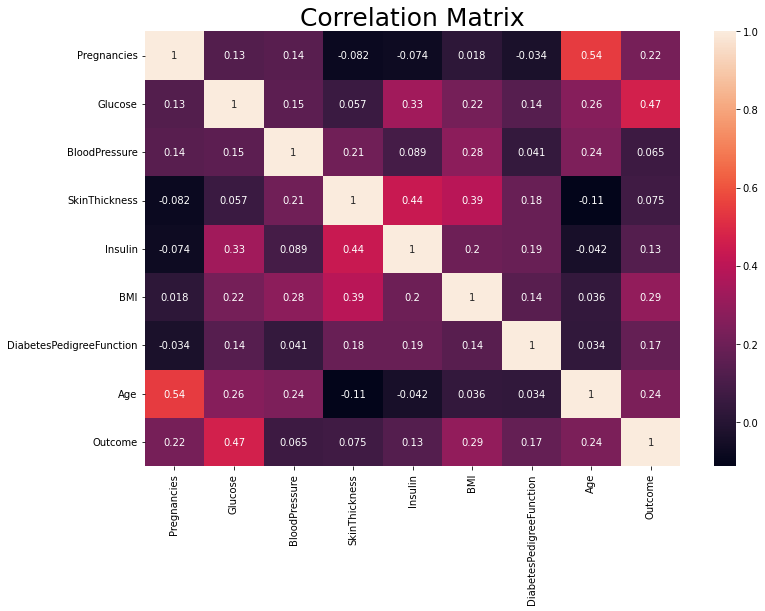

In [14]:
# Check correlation of each attributes  in the data frame using Correlation Matrix
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix", fontsize = 25);

In [15]:
# Rank the correlation values
pd.DataFrame(df.corr()["Outcome"].sort_values(ascending = False)[1:])

,Outcome
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


In [16]:
# Substitute neutral values using mean
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    mean = df[df[col] != 0][col].mean()
    std = df[df[col] != 0][col].std()

    values = df[col].values

    np.random.seed(23)

    for i, val in enumerate(values):
        if val == 0:
            values[i] = mean + std * (np.random.rand() * 2 - 1) * 1.2
    df[col] = pd.Series(values).astype(df[col].dtype)

# **K-Nearest Neighbors Classification Method**

In [17]:
# Selecting features and target variables
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [18]:
# Calculate distance between two points
def minkowski_distance(a, b, p=1):
    dim = len(a)                          # Store the number of dimensions
    distance = 0                          # Set initial distance to 0
    for d in range(dim):                  # Calculate minkowski distance using parameter p
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)    
    return distance

In [19]:
# Test the function
print("Minkowski Distance =", minkowski_distance(a=x.iloc[0], b=x.iloc[1], p=1))

Minkowski Distance = 228.276


In [20]:
# Define an arbitrary test point
test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in x
distances = []
for i in x.index:
    distances.append(minkowski_distance(test_pt, x.iloc[i]))
df_dists = pd.DataFrame(data=distances, index=x.index, columns=['Distance'])
df_dists.head()

,Distance
0,250.3
1,177.9
2,273.3
3,175.9
4,210.9


In [21]:
# Find the 5 nearest neighbors
df_nearest = df_dists.sort_values(by=['Distance'], axis=0)[:5]
df_nearest

,Distance
62,119.3
597,129.9
55,130.9
97,134.9
466,134.9


In [22]:
from collections import Counter

# Create counter object to track the labels
counter = Counter(y[df.index])

# Get most common label of all the nearest neighbors
counter.most_common()[0][0]

0

In [23]:
# Split the data - 75% train, 25% test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                   random_state=1)

# Scale the x data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
def knn_predict(x_train, x_test, y_train, y_test, k, p):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    knn_pred = []

    for test_point in x_test:
        distances = []

        for train_point in x_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nearest = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nearest.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        knn_pred.append(prediction)
        
    return knn_pred


# Make predictions on test dataset
knn_pred = knn_predict(x_train, x_test, y_train, y_test, k=5, p=1)

print(knn_pred)

[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0]


In [25]:
a = accuracy_score(y_test, knn_pred)
print("\033[1mK-Nearest Neighbors\033[0m")
print("Accuracy = {:,.2%}".format(a))

K-Nearest Neighbors
Accuracy = 71.88%


# **Machine Learning Models Comparison**

In [26]:
# Train test and split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [27]:
# Standarization
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [28]:
# Executing machine learning models
model_dt = DecisionTreeClassifier()
model_nb = GaussianNB()
model_knn = KNeighborsClassifier()

model_list = [model_dt, model_nb, model_knn]

In [29]:
# Check the accuracy of each machine learning models
for model in model_list:
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("\033[1m")
    print(model, "\033[0m")
    a = accuracy_score(pred,y_test)
    print("Accuracy = {:,.2%}".format(a))
    print("")


DecisionTreeClassifier() 
Accuracy = 66.15%


GaussianNB() 
Accuracy = 77.08%


KNeighborsClassifier() 
Accuracy = 77.60%



# **Evaluation**

## Confusion Matrix


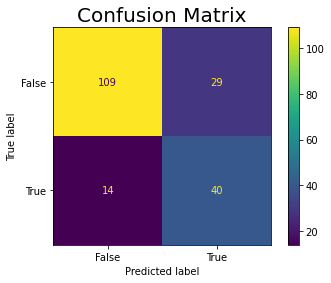

In [30]:
# Using confusion matrix for measure the performance of the classification model
confusion_matrix = metrics.confusion_matrix(pred, y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix", fontsize = 20)
plt.show()

In [31]:
pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,109,14,123
1,29,40,69
All,138,54,192


In [32]:
TP = 109; TN = 29; FP = 14; FN = 40
precision = TP / (TP + FP)
recall = TP / (TP + TN)
acc = (TP + TN) / (TP + FP + TN + FN)
print ("True Positive =", TP)
print ("True Negative =", TN)
print ("False Positive =", FP)
print ("False Positive =", FN)
print("")
print("Precision = {:,.2}".format(precision))
print("Recall = {:,.2}".format(recall))
print("Overall Accuracy = {:,.2}".format(acc))

True Positive = 109
True Negative = 29
False Positive = 14
False Positive = 40

Precision = 0.89
Recall = 0.79
Overall Accuracy = 0.72


In [33]:
# Classification Report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84       138
           1       0.58      0.74      0.65        54

    accuracy                           0.78       192
   macro avg       0.73      0.77      0.74       192
weighted avg       0.80      0.78      0.78       192



## Check error rate of K values

Text(0, 0.5, 'Mean Error')

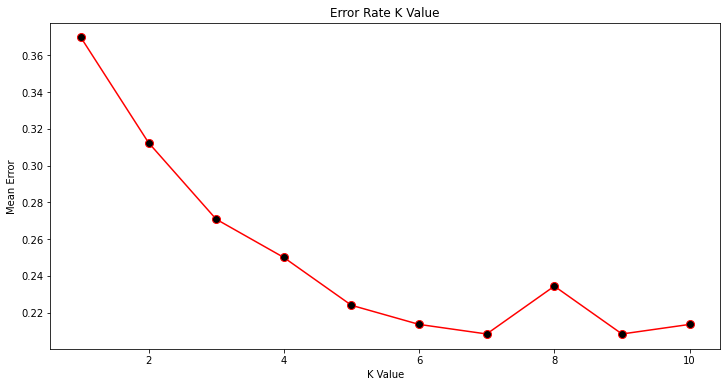

In [34]:
# Calculating error for K values between 1 and 10
error = []
for i in range(1, 11): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train, y_train)
 pred_i = knn.predict(x_test)
 error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), error, color='red', linestyle='-', marker='o',  
         markerfacecolor='black', markersize=8)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

Uji kembali dengan menggunakan nilai K = 7

In [39]:
# Make predictions on test dataset
knn_pred = knn_predict(x_train, x_test, y_train, y_test, k=7, p=1)

print(knn_pred)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]


In [40]:
# Classification Report
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       123
           1       0.72      0.52      0.61        69

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.74       192



In [43]:
# Checking the accuracy
a = accuracy_score(y_test, knn_pred)
print("\033[1mK-NN dengan nilai K=7\033[0m")
print("Accuracy = {:,.2%}".format(a))

K-NN dengan nilai K=7
Accuracy = 75.52%


# **References**

-	https://www.kaggle.com/code/antoniosabatini/diabetes-complete-eda-and-svc-tuning
-	https://www.kaggle.com/code/baturalpsert/diabetes-classification-roc-curve
- https://blog.devgenius.io/implementing-k-nearest-neighbors-from-scratch-in-python-d5eaaf558d49